In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
#from feature_selector import FeatureSelector
import matplotlib.patches as patches

In [62]:
data = pd.read_csv("D:\\college\\HealthCare ChatBot\\train.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [63]:
print(data.describe())


data.isnull().sum()

                 id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.07

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

### Filling bmi index for null value with mean.
### Converting age to Integer type.

In [64]:
data.bmi= data.bmi.fillna(data['bmi'].mean())
#data.isnull().sum()
data.age=[int(ceil(x)) for x in data.age]

for i in data.columns:
    if(data[i].dtype==('object')):
        print(data[i].value_counts(),'\n')
data['stroke'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64 

Yes    27938
No     15462
Name: ever_married, dtype: int64 

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64 

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64 

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64 



0    42617
1      783
Name: stroke, dtype: int64

### Correlation matrix : data is not highly correlated

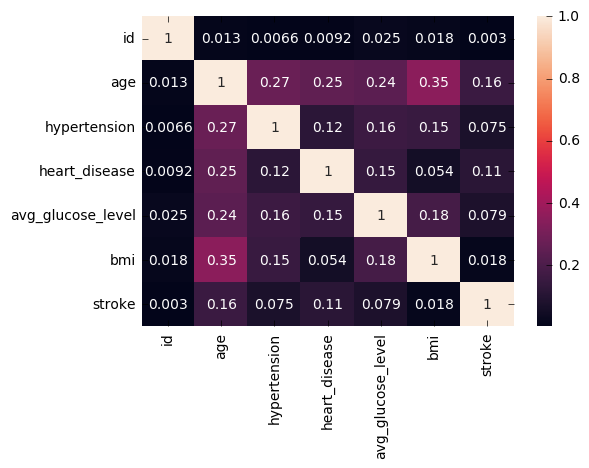

In [65]:
sns.heatmap(data.corr(),annot=True)
plt.show()



### A box plot shows that the median bmi is not any different for stroke and non-stroke victims and the mean just slightly different.
### but for age the stroke victims has higher age in comaprison to non-stroke victims

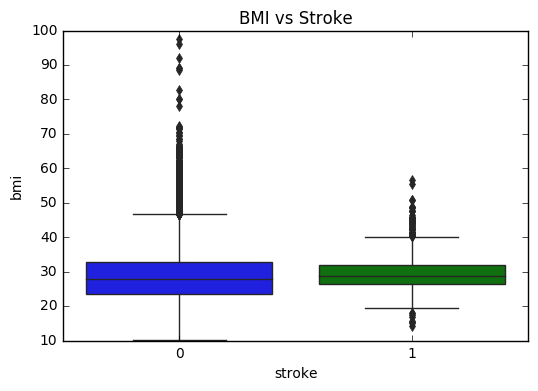

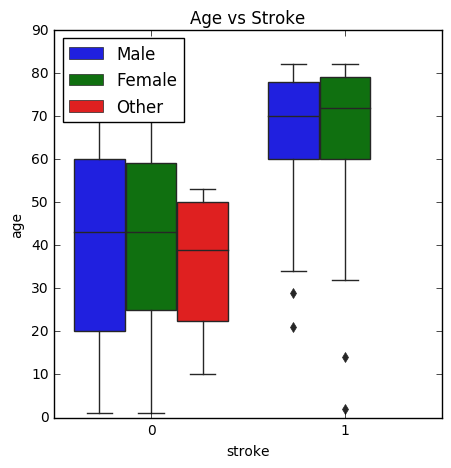

In [66]:
sns.boxplot(x='stroke',y='bmi',data=data)
plt.title("BMI vs Stroke")
plt.show()
plt.figure(figsize=(5,5))
sns.boxplot(x='stroke',y='age',hue='gender',data=data)
plt.title("Age vs Stroke")

plt.legend(loc='upper left')
plt.show()


## How does work environment and married life affects heart problems

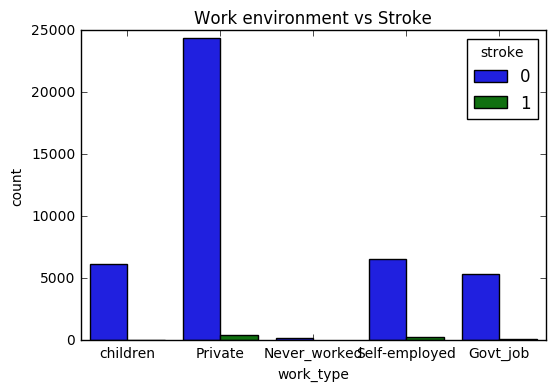

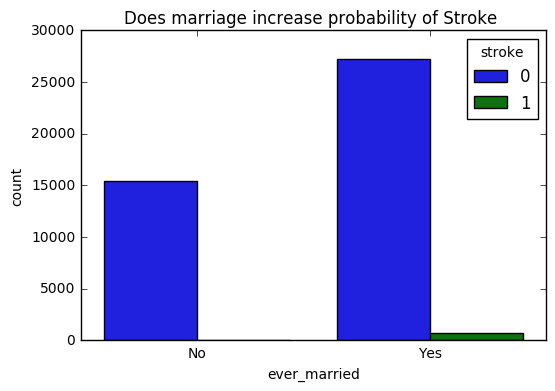

In [67]:
sns.countplot(data=data,x='work_type',hue= 'stroke')
plt.title("Work environment vs Stroke")
plt.show()
sns.countplot(data=data,x='ever_married',hue='stroke')
plt.title("Does marriage increase probability of Stroke ")
plt.show()



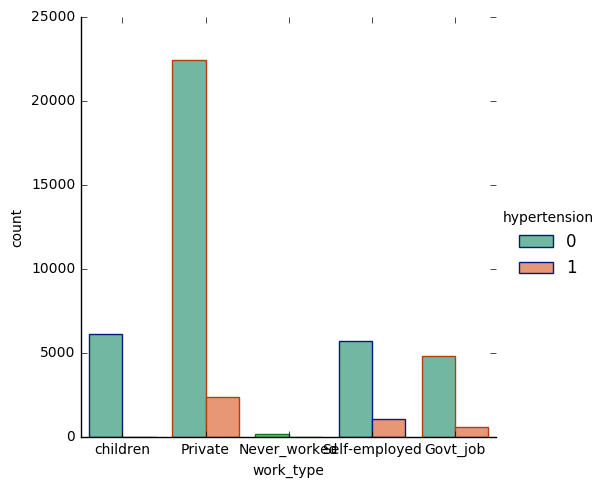

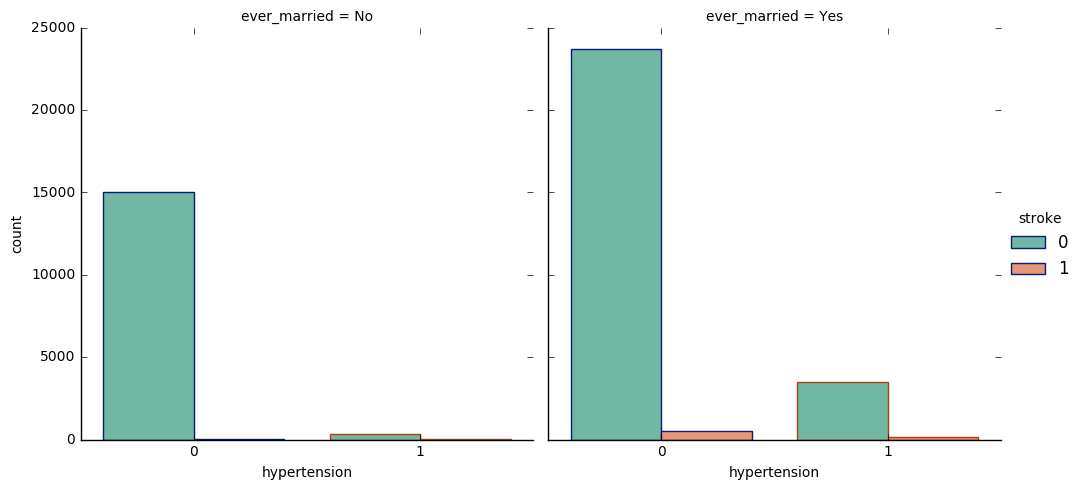

In [72]:
plt.figure(figsize=(10,10))
sns.catplot(data=data,x='work_type',hue='hypertension',kind="count",  palette="Set2",edgecolor=sns.color_palette("dark", 3) )
#plt.title("Work environment vs Stroke")

plt.show()
plt.figure(figsize=(10,10))
sns.catplot(data=data,col='ever_married',x= 'hypertension',hue='stroke',kind="count",  palette="Set2",edgecolor=sns.color_palette("dark", 3) )
#plt.title("Work environment vs Stroke")
plt.show()


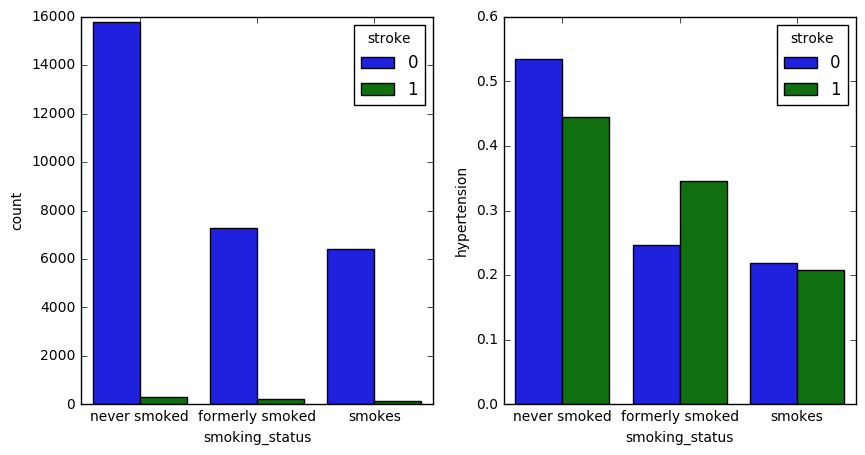

In [109]:
#plt.figure(figsize=(25,25))
#sns.catplot(data=data,col='smoking_status',x= 'hypertension',hue='stroke',kind="count",  estimator=lambda x: len(data.hypertension) / len(data.stroke) * 100 )
#plt.title("Work environment vs Stroke")
#plt.show()

#df = sns.load_dataset(data)
y, x, hue = "hypertension", "smoking_status", "stroke"


f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.countplot(x=x, hue=hue, data=data, ax=axes[0])

prop_df = (data[x]
           .groupby(data[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])
plt.show()



In [ ]:
from sklearn